In [1]:
# In the root of the repo run "pip install --editable ."

# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

In [10]:
from src.data.import_data import import_df_from_zip_pkl
import rdtools
import pickle
import time
import matplotlib.pyplot as plt

In [5]:
def cods_with_bootstrap(synth_type, index=0, realizations=512, clipping="basic", verbose=False):
    """
    
    """  
    # Load datasets
    path_to_zip_pkl_pi = "../data/raw/synthetic_" + synth_type + "_pi_daily.zip"
    try:
        df = import_df_from_zip_pkl(path_to_zip_pkl_pi, index=index, verbose=True, minofday=False)
    except:
        if verbose:
            print("No available synthetic dataset, the availabe types are 'basic', 'soil', 'soil_weather', 'weather'")
    
    start_time = time.time() # remove?
    
    # Initialize instance
    if clipping=="basic":
        cods_instance = rdtools.soiling.cods_analysis(df.PI_clipping_basic)
    elif clipping=="flexible":
        cods_instance = rdtools.soiling.cods_analysis(df.PI_clipping_flexible)
    elif clippling=="universal":
        cods_instance = rdtools.soiling.cods_analysis(df.PI_clipping_universal)
    else:
        if verbose==True:
            print("Function for removing clipping not implemented!")
    # run algoritm
    cods_instance.run_bootstrap(realizations, verbose=verbose)
    
    end_time = time.time() # remove?
    print("--- %s min ---" %((end_time - start_time)/60.)) # remove?
    
    # save results
    _file = open("../data/processed/cods_results_" + synth_type + "_" + str(index) + "_" + str(realizations) + ".pkl", "wb")
    pickle.dump(cods_instance , _file)
    
    return

def load_cods_results(synth_type, index=0, realizations=512, verbose=False):
    """
    
    """
    # Load results
    try:
        _file         = open("../data/processed/cods_results_" + synth_type + "_" + str(index) + "_" + str(realizations) + ".pkl", "rb")
        print (_file)
    except:
        if verbose:
            print("No available synthetic dataset, the availabe types are 'basic', 'soil', 'soil_weather', 'weather'")
    
    return cods_instance

In [7]:
# check everything is working correctly for 16 realizations
CODS_with_bootstrap("soil", index=0, realizations=16, clipping="flexible", verbose=True)

time for importing dataframe: 0.00 seconds
Initially fitting 16 models
# 16 | Used: 1.7 min | Left: 0.0 min | Progress: [----------------------------->] 100 %
            order    dt        pt     ff      RMSE     SR==1   weights    sss
0   [SR, SC, Rd]  0.25  0.666667   True  0.005690  0.203724  0.052028  False
1   [SR, SC, Rd]  0.25  0.666667  False  0.005690  0.203724  0.052028  False
2   [SR, SC, Rd]  0.25  1.500000   True  0.004606  0.240964  0.062350  False
3   [SR, SC, Rd]  0.25  1.500000  False  0.004606  0.240964  0.062350  False
4   [SR, SC, Rd]  0.75  0.666667   True  0.004106  0.239869  0.069998  False
5   [SR, SC, Rd]  0.75  0.666667  False  0.004106  0.239869  0.069998  False
6   [SR, SC, Rd]  0.75  1.500000   True  0.004142  0.239869  0.069397  False
7   [SR, SC, Rd]  0.75  1.500000  False  0.004142  0.239869  0.069397  False
8   [SC, SR, Rd]  0.25  0.666667   True  0.004746  0.280394  0.058648  False
9   [SC, SR, Rd]  0.25  0.666667  False  0.004746  0.280394  0.058648 

/home/maria/miniconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


# 16 | Used: 0.3 min | Left: 0.0 min | Progress: [----------------------------->] 100 %
Final RMSE: 0.00409
--- 1.9872755368550619 min ---


In [7]:
# check loading CODS results
cods_instance = load_CODS_results("soil", index=0, realizations=16, verbose=False)

<_io.BufferedReader name='../data/processed/cods_results_soil_0_16.pkl'>


In [28]:
results_df = cods_instance.result_df
results_df.head()

,soiling_ratio,soiling_rates,cleaning_events,seasonal_component,degradation_trend,total_model,residuals,SR_low,SR_high,rates_low,rates_high,bt_soiling_ratio,bt_soiling_rates,seasonal_low,seasonal_high,model_low,model_high
datetime,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00-05:00,0.963832,0.000686,0.047082,0.994163,1.000000,0.881136,0.922474,0.955449,0.980586,0.000081,0.001268,0.967095,0.000854,0.989694,0.997655,0.883970,0.898860
2015-01-02 00:00:00-05:00,0.964454,0.000559,0.017457,0.994214,0.999976,0.881728,0.920791,0.956372,0.981276,0.000076,0.001224,0.967939,0.000842,0.989686,0.997727,0.884926,0.899176
2015-01-03 00:00:00-05:00,0.964967,0.000467,0.008313,0.994267,0.999952,0.882223,0.919191,0.957191,0.982244,0.000066,0.001217,0.968772,0.000832,0.989684,0.997823,0.885765,0.899180
2015-01-04 00:00:00-05:00,0.965404,0.000408,0.010968,0.994321,0.999928,0.882650,0.917691,0.958095,0.982847,0.000059,0.001237,0.969600,0.000826,0.989694,0.997916,0.886411,0.899741
2015-01-05 00:00:00-05:00,0.965797,0.000379,0.015678,0.994379,0.999905,0.883040,0.916184,0.958939,0.984057,0.000057,0.001234,0.970421,0.000822,0.989718,0.997994,0.887198,0.900361


In [15]:
# Run CODS algorithm wo bootstrap

synth_type = "soil"
index      = 40
path_to_zip_pkl_pi = "../data/raw/synthetic_" + synth_type + "_pi_daily.zip"
df = import_df_from_zip_pkl(path_to_zip_pkl_pi, index=index, verbose=True, minofday=False)

#cods_instance = rdtools.soiling.cods_analysis(df.PI)
#cods_instance.iterative_signal_decomposition(perfect_cleaning=True, order=['SC', 'SR', 'Rd'])

time for importing dataframe: 0.00 seconds


In [16]:
df.head()

,Power,Degradation,Soiling,Faults,PI_clipping_basic,PI_clipping_flexible,PI_clipping_universal
datetime,,,,,,,
2015-01-01 00:00:00-05:00,305.870139,0.99998,0.99598,1,0.883356,0.883356,0.772812
2015-01-02 00:00:00-05:00,306.782639,0.99995,0.99397,1,0.881933,0.881933,0.772190
2015-01-03 00:00:00-05:00,307.806250,0.99993,0.99195,1,0.880448,0.880448,0.771251
2015-01-04 00:00:00-05:00,308.943750,0.99991,0.98994,1,0.879057,0.879057,0.770541
2015-01-05 00:00:00-05:00,310.221528,0.99988,0.98793,1,0.877681,0.877681,0.770002


Text(0.5, 0, 'time [years]')

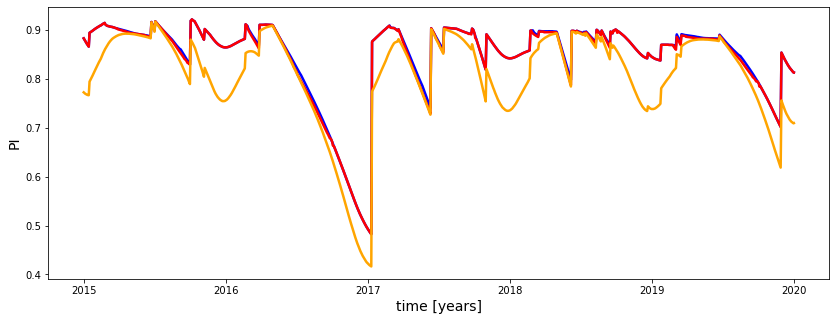

In [17]:
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(df.PI_clipping_basic, color="blue", lw=2.5, label="basic")
ax.plot(df.PI_clipping_flexible, color="red", lw=2.5, label="flexible")
ax.plot(df.PI_clipping_universal, color="orange", lw=2.5, label="universal")
ax.set_ylabel("PI", fontsize=14)
ax.set_xlabel("time [years]", fontsize=14)